<a href="https://colab.research.google.com/github/Ahib-Afnan-Siam/Car-Price-Predition/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
#filter warnings
warnings.filterwarnings('ignore')   # is used to ignore all warnings that may occur in the code execution.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder    #The LabelEncoder is used for encoding categorical features into numerical values.
from sklearn.linear_model import LinearRegression
import seaborn as sns    #Seaborn provides a more streamlined way to create advanced visualizations than Matplotlib.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score   #used for evaluating the performance of regression models
import copy, math


from sklearn.impute import SimpleImputer   #used for imputing missing values in datasets.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler  #used for scaling features to a given range, usually between 0 and 1


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  #used for building Naive Bayes models


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
data = pd.read_excel('CAR DETAILS FROM CAR DEKHO.xlsx')
data.head(7)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,NaN,140000.0,125000.0,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016.0,550000.0,25000.0,Petrol,Individual,Manual,First Owner


In [ ]:
data.describe()   #It computes several summary statistics, including count, mean, standard deviation, minimum and maximum values, and the quartiles of the data. By default, only the numeric columns are returned, and the non-numeric columns are excluded.

,year,selling_price,km_driven
count,4332.000000,4.325000e+03,4333.000000
mean,2013.090259,5.044126e+05,66236.430649
std,4.213690,5.793743e+05,46660.795071
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.049990e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4332 non-null   object 
 1   year           4332 non-null   float64
 2   selling_price  4325 non-null   float64
 3   km_driven      4333 non-null   float64
 4   fuel           4329 non-null   object 
 5   seller_type    4332 non-null   object 
 6   transmission   4330 non-null   object 
 7   owner          4323 non-null   object 
dtypes: float64(3), object(5)
memory usage: 271.4+ KB



# **Data Preprocessing**





In [ ]:
data.isna().sum()       #used in Pandas library to count the number of missing values (NaN) in each column of a DataFrame

name              8
year              8
selling_price    15
km_driven         7
fuel             11
seller_type       8
transmission     10
owner            17
dtype: int64

In [ ]:
data.shape

(4340, 8)

In [ ]:
#dropping the rows
data = data.dropna(axis = 0, subset = ['name', 'year','selling_price', 'fuel', 'seller_type', 'transmission','owner'])
print("Shape after dropping:", data.shape)

Shape after dropping: (4268, 8)


In [ ]:
"""data = data.dropna(axis = 1)
print("Shape after dropping:", data.shape)"""

'data = data.dropna(axis = 1)\nprint("Shape after dropping:", data.shape)'

In [ ]:
#imputing missing values


impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['km_driven']])  #it has to be 2D to pass as a dataframe

data['km_driven'] = impute.transform(data[['km_driven']])

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Label-> selling price

data['selling_price'].value_counts()

300000.0    159
250000.0    124
350000.0    117
550000.0    104
600000.0     99
           ... 
458000.0      1
381000.0      1
751000.0      1
321000.0      1
865000.0      1
Name: selling_price, Length: 443, dtype: int64

In [ ]:
print(data['selling_price'].min())
print(data['selling_price'].max())

20000.0
8900000.0


In [ ]:
bins=[20000,250000,400000,9000000]
labels=['low','medium','high']
data['selling_price']=pd.cut(data['selling_price'], bins, labels=labels)
data['selling_price'].value_counts()

high      1883
low       1472
medium     912
Name: selling_price, dtype: int64

In [ ]:
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,low,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,low,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,high,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,low,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,high,141000.0,Diesel,Individual,Manual,Second Owner


In [ ]:
data.isna().sum()

name             0
year             0
selling_price    1
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
data = data.dropna(axis = 0, subset = ['selling_price'])

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Encoding categorical features

le = LabelEncoder()

data['name'] = le.fit_transform(data['name'])

data['selling_price'] = data['selling_price'].map({'low':0, 'medium':1, 'high':2})

data['transmission'] = le.fit_transform(data['transmission']) #binary

data['owner'] = data['owner'].map({'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':4,
                                   'Third Owner':3, 'Test Drive Car':0})  #ordinal categorical
data['fuel'] = data['fuel'].map({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4})

data['seller_type'] = data['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,767,2007.0,0,70000.0,0,0,1,1
1,1031,2007.0,0,50000.0,0,0,1,1
2,501,2012.0,2,100000.0,1,0,1,1
3,116,2017.0,0,46000.0,0,0,1,1
4,276,2014.0,2,141000.0,1,0,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4267 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4267 non-null   int64   
 1   year           4267 non-null   float64 
 2   selling_price  4267 non-null   category
 3   km_driven      4267 non-null   float64 
 4   fuel           4267 non-null   int64   
 5   seller_type    4267 non-null   int64   
 6   transmission   4267 non-null   int64   
 7   owner          4267 non-null   int64   
dtypes: category(1), float64(2), int64(5)
memory usage: 271.0 KB


In [ ]:
data['selling_price']=data['selling_price'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4267 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4267 non-null   int64  
 1   year           4267 non-null   float64
 2   selling_price  4267 non-null   int64  
 3   km_driven      4267 non-null   float64
 4   fuel           4267 non-null   int64  
 5   seller_type    4267 non-null   int64  
 6   transmission   4267 non-null   int64  
 7   owner          4267 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 300.0 KB


# **Data Visualization**

In [ ]:
from scipy.stats import norm   #provides functions for working with normal (Gaussian) distributions, such as probability density functions, cumulative distribution functions, and inverse cumulative distribution functions.
from scipy import stats       #provides functions and classes for working with probability distributions, statistical tests, and descriptive statistics

In [ ]:
#skewness
print("Skewness: %f" % data['selling_price'].skew())

#since the skewness value is close to zero, we can say that the distribution of 'selling_price' is approximately symmetric, or normally distributed

Skewness: -0.188553


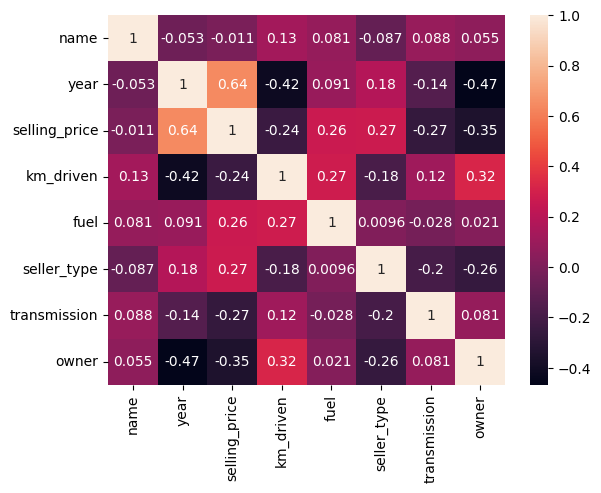

In [ ]:
plt.figure()
sns.heatmap(data.corr(), annot=True)

plt.show()

#visualize the pairwise correlations between the variables in a Pandas DataFrame

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = px.pie(data,names='selling_price',title='Proportion Low, Medium, High car price',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

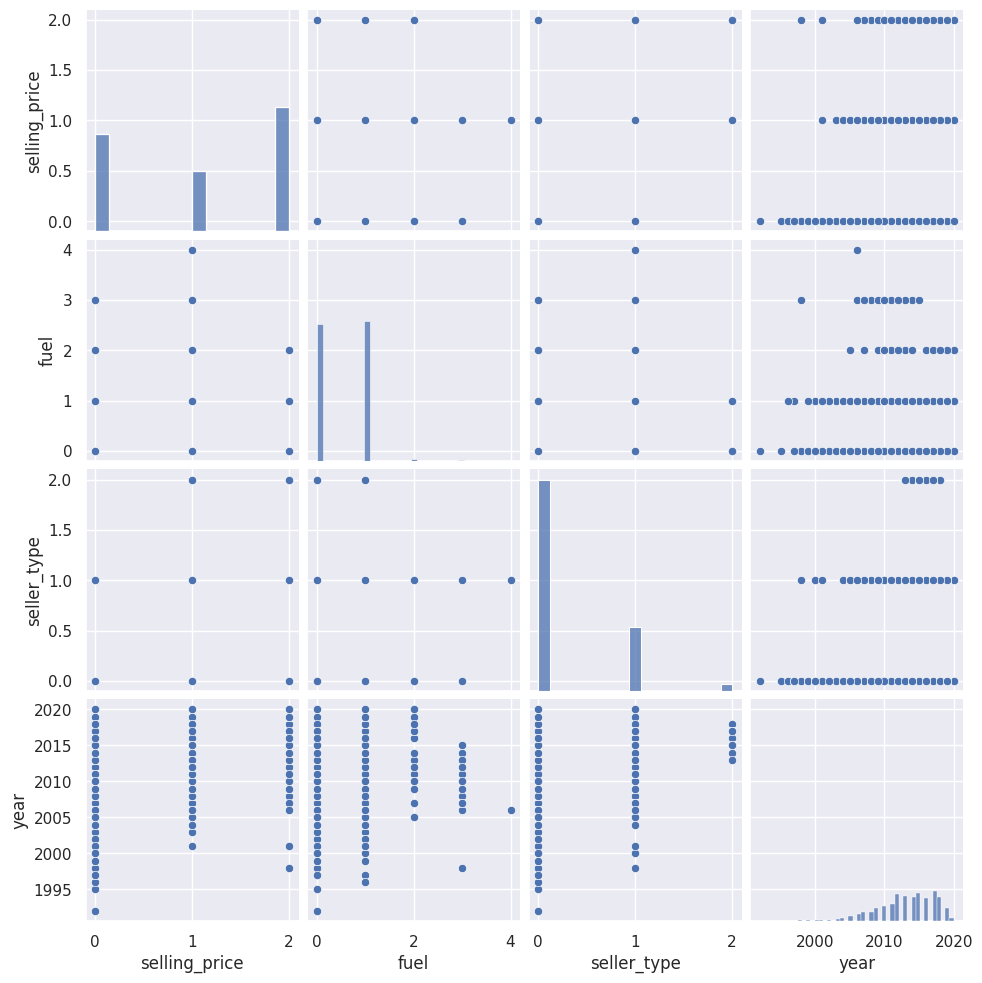

In [ ]:
#scatterplot
sns.set()
cols = ['selling_price', 'fuel', 'seller_type', 'year']
sns.pairplot(data[cols], height = 2.5)
plt.show()

In [ ]:
fig = px.bar(data, x='selling_price', y='year',title='Price Vs Year',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

<Axes: title={'center': 'Label Distribution Before Oversampling'}>

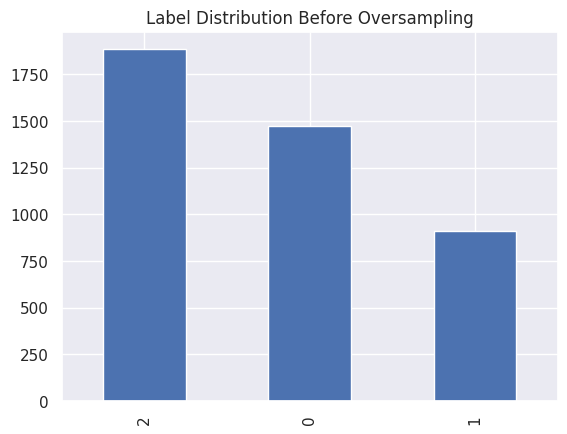

In [ ]:
data['selling_price'].value_counts().plot(kind='bar', title='Label Distribution Before Oversampling')

In [ ]:
#oversampling

class_0 = data[data['selling_price'] == 0]
class_1 = data[data['selling_price'] == 1]
class_2 = data[data['selling_price'] == 2]

<Axes: title={'center': 'Label Distribution after Oversampling'}>

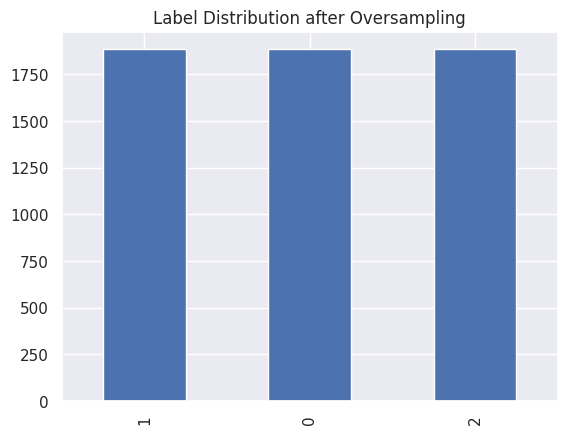

In [ ]:
class_1_over = class_1.sample(len(class_2), replace=True)
class_0_over = class_0.sample(len(class_2), replace=True)

df_new = pd.concat([class_1_over,class_0_over, class_2], axis=0)

df_new['selling_price'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [ ]:
df_new['selling_price'].value_counts()

1    1883
0    1883
2    1883
Name: selling_price, dtype: int64

In [ ]:
df_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1323,1186,2009.0,1,100000.0,1,0,0,2
1518,1035,2014.0,1,41000.0,0,1,1,1
3990,785,2018.0,1,17000.0,0,0,1,1
3131,957,2012.0,1,120000.0,1,0,1,2
3329,1472,2011.0,1,60000.0,0,0,1,1


In [ ]:
Y = data['selling_price']
X = data.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)
X

,year,fuel,seller_type
0,2007.0,0,0
1,2007.0,0,0
2,2012.0,1,0
3,2017.0,0,0
4,2014.0,1,0
...,...,...,...
4335,2014.0,1,0
4336,2014.0,1,0
4337,2009.0,0,0
4338,2016.0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.66


# **Minmaxscaler**

In [ ]:
#Minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

#scoring on the scaled test set
print("MinMax Scaled test set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

MinMax Scaled test set accuracy: 0.65


In [ ]:
#preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Standard test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Standard test accuracy: 0.66


# **Train/Test split**

In [ ]:
Y = df_new['selling_price']
X = df_new.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)

X_features = data.columns

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
accuracies = {}
print("Test set accuracy: {:.3f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.587


In [ ]:
predictions1 = knn.predict(X_test)
a1=accuracy_score(y_test, predictions1)
print(a1)
accuracies['KNN'] = a1

0.5870206489675516


In [ ]:
classificationreport = classification_report(y_test, predictions1)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.59      0.83      0.69       559
           1       0.50      0.30      0.37       608
           2       0.64      0.67      0.65       528

    accuracy                           0.59      1695
   macro avg       0.58      0.60      0.57      1695
weighted avg       0.57      0.59      0.56      1695



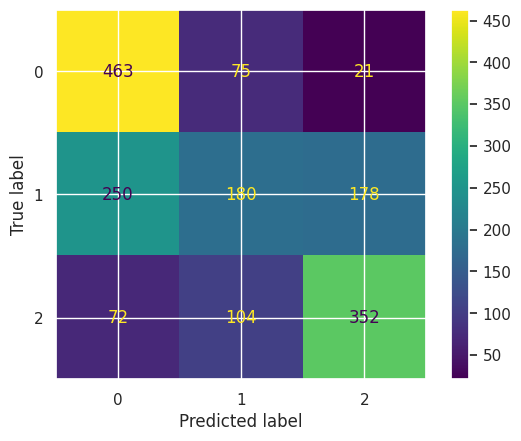

In [ ]:
cm = confusion_matrix(y_test, predictions1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
lr = LogisticRegression()  #Used when the target variable is categorical. Good for binary classification problems
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions2 = lr.predict(X_test)
a2=accuracy_score(y_test, predictions2)
print(a2)
accuracies['Logistic Regression'] = a2

0.4584070796460177


In [ ]:
classificationreport = classification_report(y_test, predictions2)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.51      0.62      0.56       559
           1       0.00      0.00      0.00       608
           2       0.42      0.81      0.56       528

    accuracy                           0.46      1695
   macro avg       0.31      0.48      0.37      1695
weighted avg       0.30      0.46      0.36      1695



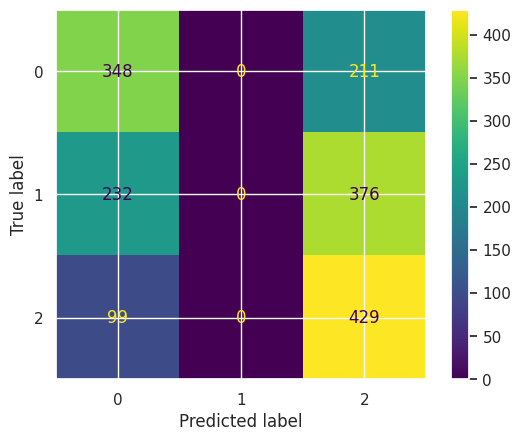

In [ ]:
cm = confusion_matrix(y_test, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
mode = SVC()
mode.fit(X_train,y_train)

SVC()

In [ ]:
predictions3 = mode.predict(X_test)
a3=accuracy_score(y_test, predictions3)
print(a3)
accuracies['SVM'] = a3

0.31150442477876106


In [ ]:
classificationreport = classification_report(y_test, predictions3)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       559
           1       0.00      0.00      0.00       608
           2       0.31      1.00      0.48       528

    accuracy                           0.31      1695
   macro avg       0.10      0.33      0.16      1695
weighted avg       0.10      0.31      0.15      1695



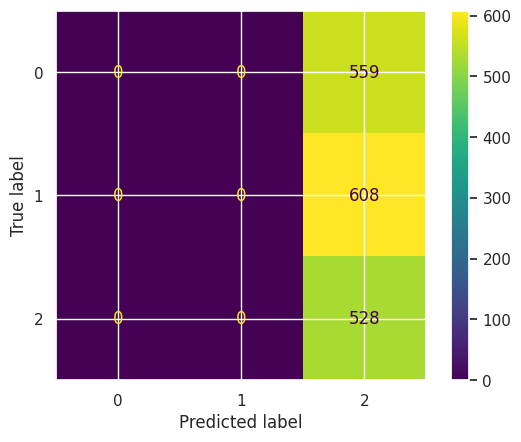

In [ ]:
cm = confusion_matrix(y_test, predictions3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
predictions4 = clf.predict(X_test)
a4=accuracy_score(predictions4,y_test)
print(a4)
accuracies['Decision Tree'] = a4

0.6519174041297935


In [ ]:
classificationreport = classification_report(y_test, predictions4)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       559
           1       0.55      0.49      0.52       608
           2       0.67      0.76      0.71       528

    accuracy                           0.65      1695
   macro avg       0.65      0.66      0.65      1695
weighted avg       0.65      0.65      0.65      1695



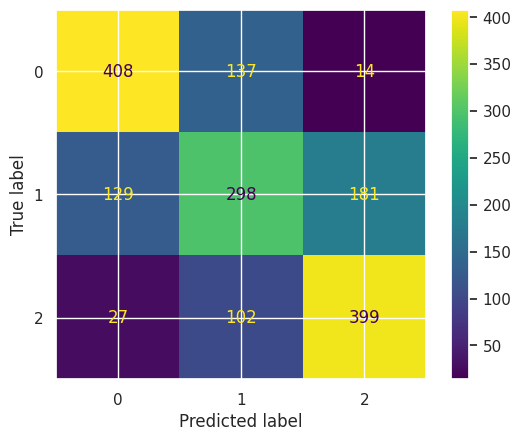

In [ ]:
cm = confusion_matrix(y_test, predictions4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

[Text(0.490093085106383, 0.95, 'year <= 2012.5\nentropy = 1.585\nsamples = 3954\nvalue = [1324, 1275, 1355]\nclass = 3'),
 Text(0.2488031914893617, 0.85, 'fuel <= 0.5\nentropy = 1.246\nsamples = 1665\nvalue = [1044, 475, 146]\nclass = 1'),
 Text(0.11702127659574468, 0.75, 'year <= 2008.5\nentropy = 0.828\nsamples = 872\nvalue = [695, 158, 19]\nclass = 1'),
 Text(0.06808510638297872, 0.65, 'year <= 2004.5\nentropy = 0.328\nsamples = 408\nvalue = [388, 13, 7]\nclass = 1'),
 Text(0.03404255319148936, 0.55, 'year <= 2001.5\nentropy = 0.136\nsamples = 105\nvalue = [103, 0, 2]\nclass = 1'),
 Text(0.02553191489361702, 0.45, 'year <= 1997.5\nentropy = 0.242\nsamples = 50\nvalue = [48, 0, 2]\nclass = 1'),
 Text(0.01702127659574468, 0.35, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = 1'),
 Text(0.03404255319148936, 0.35, 'year <= 1998.5\nentropy = 0.262\nsamples = 45\nvalue = [43, 0, 2]\nclass = 1'),
 Text(0.01702127659574468, 0.25, 'seller_type <= 0.5\nentropy = 0.469\nsamples = 10\nv

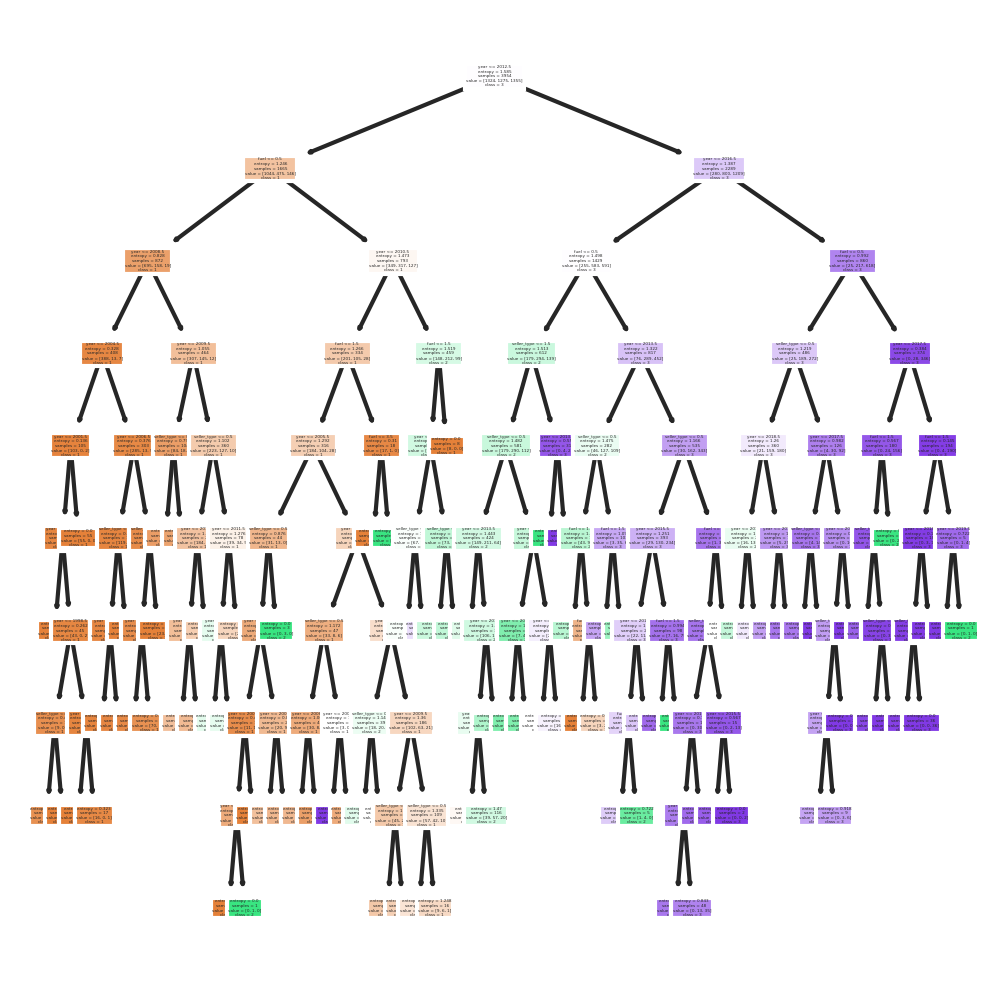

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = X.columns, class_names=['1','2','3'],filled = True)

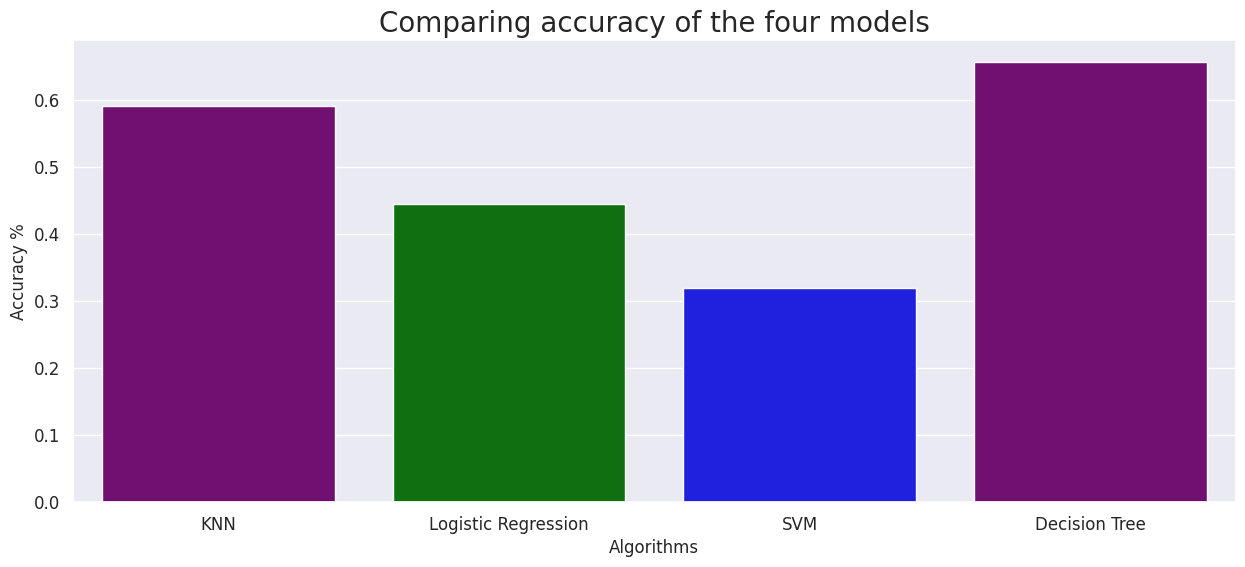

In [ ]:
colors = ["purple", "green", "blue"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()